In [1]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
import numpy.linalg as lng
import seaborn as sns

# Data Generation

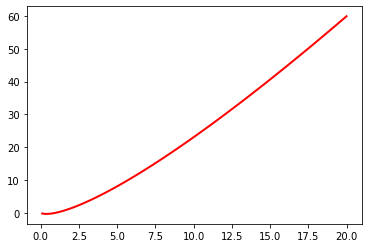

In [2]:
x = np.linspace(0.1, 20, 100)
y = x * np.log(x)
plt.plot(x, y, color = 'red', linewidth = 2)
plt.show()

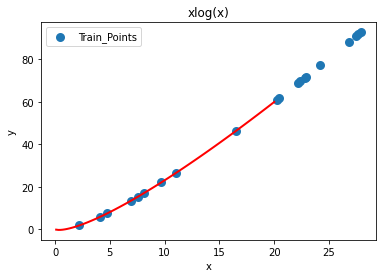

In [3]:
noise = np.random.randn(20)
x_train = (np.random.randint(1, 30, 20) + noise).reshape((-1,1))
y_train = x_train * np.log(x_train)
plt.scatter(x_train, y_train, linewidth = 3)
plt.plot(x, y, color = 'red', linewidth = 2)
plt.legend(['Train_Points'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('xlog(x)')
plt.show()

In [4]:
noise2 = np.random.randn(10)
x_test = (np.random.randint(1, 25, 10) + noise2).reshape((-1,1))
y_test = x_test * np.log(x_test)

# Gaussian Process Regression


Rather than using a parametric form for $f({\mathbf x})$, we will use the values of the latent function that we will model with a Gaussian process

$$f({\mathbf x}) \sim {\cal GP}\left(0,k_f({\mathbf x}_i,{\mathbf x}_j)\right),$$

where we are assuming a zero mean, and where we will use the Ornstein-Uhlenbeck covariance function, which is defined as:

$$k_f({\mathbf x}_i,{\mathbf x}_j) = \sigma_0^2 \exp \left( -\frac{1}{l}\|{\mathbf x}_i-{\mathbf x}_j\|\right)$$

First, we will use the following gross estimation for the hyperparameters:


As we studied in a previous session, the joint distribution of the target values in the training set, ${\mathbf s}$, and the latent values corresponding to the test points, ${\mathbf f}^\ast$, is given by

$$\left[\begin{array}{c}{\bf s}\\{\bf f}^\ast\end{array}\right]~\sim~{\cal N}\left({\bf 0},\left[\begin{array}{cc}{\bf K} + \sigma_\varepsilon^2 {\bf I}& {\bf K}_\ast^\top \\ {\bf K}_\ast & {\bf K}_{\ast\ast} \end{array}\right]\right)$$

Using this model, obtain the posterior of ${\mathbf s}^\ast$ given ${\mathbf s}$. In particular, calculate the <i>a posteriori</i> predictive mean and standard deviations, ${\mathbb E}\left\{s({\bf x}^\ast)\mid{\bf s}\right\}$ and $\sqrt{{\mathbb V}\left\{s({\bf x}^\ast)\mid{\bf s}\right\}}$ for each test sample ${\bf x}^\ast$.


In [5]:
dist = spatial.distance.cdist(x_train, x_train)
dist_star_star = spatial.distance.cdist(x_test, x_test)
dist_star = spatial.distance.cdist(x_test, x_train)

In [6]:
sigma_0 = np.std(y_train)
sigma_eps = sigma_0 / np.sqrt(10)
l = 8
K = sigma_0**2 * np.exp(-dist/l)
K_star_star = sigma_0**2 * np.exp(-dist_star_star/l)
K_star = sigma_0**2 * np.exp(-dist_star/l)

In [7]:
m_gp = K_star.dot(np.linalg.inv(K + sigma_eps**2 * np.eye(x_train.shape[0]))).dot(y_train)

# Evaluation

In [10]:
RMSE = (np.mean((m_gp-y_test)**2))**0.5 # Root Mean Square Error
RMSE

0.8940059612733139

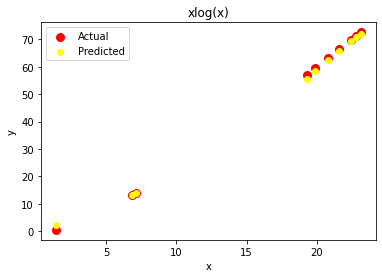

In [9]:
plt.scatter(x_test, y_test, color = 'red', linewidth = 3)
plt.scatter(x_test, m_gp, color = 'yellow')
plt.legend(['Actual', 'Predicted'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('xlog(x)')
plt.show()